In [ ]:


import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')


import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

 


/kaggle/input/marmara-region-earthquakes-apr-2324-2025/deprem_son24saat_duzenli.csv


## Title: Marmara Region Earthquakes (Apr 23-24, 2025)



#### Description: A series of significant earthquakes struck the Marmara Region in Turkey on April 23-24, 2025, causing widespread damage and triggering emergency response efforts.

## Import dataset

In [2]:
df = pd.read_csv('/kaggle/input/marmara-region-earthquakes-apr-2324-2025/deprem_son24saat_duzenli.csv')

In [3]:
df.head()

,Olus_Zamani,Enlem,Boylam,Derinlik_km,Buyukluk,Yer
0,2025.04.23 13:01:02,40.8427,28.3802,21.3,4.3,MARMARA DENIZI
1,2025.04.23 13:02:32,40.8640,28.4223,18.7,5.2,MARMARA DENIZI
2,2025.04.23 13:05:43,40.8213,28.2977,12.3,3.3,MARMARA DENIZI
3,2025.04.23 13:06:59,40.8662,28.4270,22.9,3.6,MARMARA DENIZI
4,2025.04.23 13:07:30,40.8252,28.3233,11.0,3.3,MARMARA DENIZI


In [4]:
df.tail()

,Olus_Zamani,Enlem,Boylam,Derinlik_km,Buyukluk,Yer
284,2025.04.24 09:22:08,40.8380,28.1362,19.0,3.3,MARMARA DENIZI
285,2025.04.24 10:07:40,40.8397,28.3910,17.0,2.9,MARMARA DENIZI
286,2025.04.24 10:12:47,36.6740,25.7035,12.8,3.1,EGE DENIZI
287,2025.04.24 12:03:37,40.8603,28.4188,16.0,2.7,MARMARA DENIZI
288,2025.04.24 12:06:39,36.5345,25.6680,19.9,3.4,EGE DENIZI


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 289 entries, 0 to 288
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Olus_Zamani  289 non-null    object 
 1   Enlem        289 non-null    float64
 2   Boylam       289 non-null    float64
 3   Derinlik_km  289 non-null    float64
 4   Buyukluk     289 non-null    float64
 5   Yer          289 non-null    object 
dtypes: float64(4), object(2)
memory usage: 13.7+ KB


In [6]:
df.describe()

,Enlem,Boylam,Derinlik_km,Buyukluk
count,289.000000,289.000000,289.000000,289.000000
mean,40.676970,28.502753,14.656747,2.446713
std,0.721588,1.301043,5.984137,0.706073
min,35.756200,25.668000,1.200000,1.200000
25%,40.839300,28.305300,11.500000,1.900000
50%,40.850800,28.381800,14.300000,2.300000
75%,40.862500,28.419300,19.500000,2.900000
max,40.991500,40.216000,29.600000,5.200000


In [7]:
df.isnull().sum()

Olus_Zamani    0
Enlem          0
Boylam         0
Derinlik_km    0
Buyukluk       0
Yer            0
dtype: int64

In [8]:
df.duplicated().sum()

0

In [9]:
df.dtypes

Olus_Zamani     object
Enlem          float64
Boylam         float64
Derinlik_km    float64
Buyukluk       float64
Yer             object
dtype: object

In [10]:
df.shape

(289, 6)

In [11]:
df.columns

Index(['Olus_Zamani', 'Enlem', 'Boylam', 'Derinlik_km', 'Buyukluk', 'Yer'], dtype='object')

## Data visualizations

In [12]:
# 1. Visualize the 'Olus_Zamani' (Date/Time of Occurrence)
plt.figure(figsize=(10, 6))
df['Olus_Zamani'] = pd.to_datetime(df['Olus_Zamani'])  # Convert to datetime if not already
df['Year'] = df['Olus_Zamani'].dt.year  # Extract the year for visualization

<Figure size 1000x600 with 0 Axes>

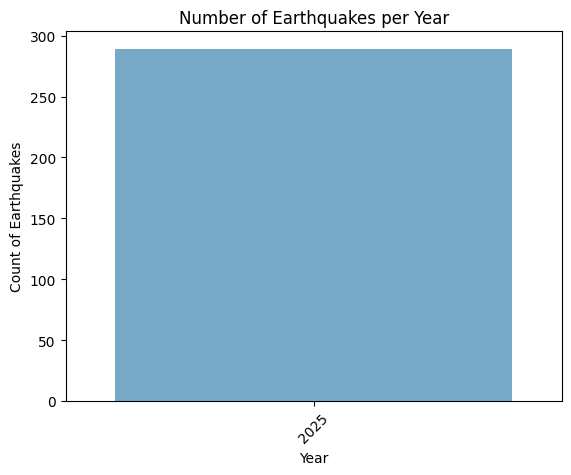

In [13]:
# Plotting number of earthquakes per year
plt.title('Number of Earthquakes per Year')
sns.countplot(data=df, x='Year', palette="Blues")
plt.xlabel('Year')
plt.ylabel('Count of Earthquakes')
plt.xticks(rotation=45)
plt.show()

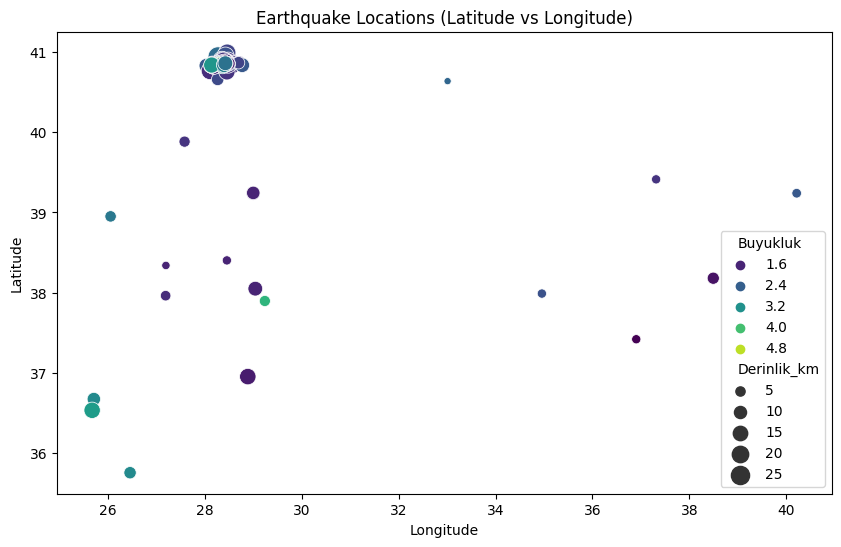

In [14]:
# 2. Visualize the 'Enlem' (Latitude) and 'Boylam' (Longitude)
plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Boylam', y='Enlem', hue='Buyukluk', size='Derinlik_km', sizes=(20, 200), palette="viridis")
plt.title('Earthquake Locations (Latitude vs Longitude)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.show()

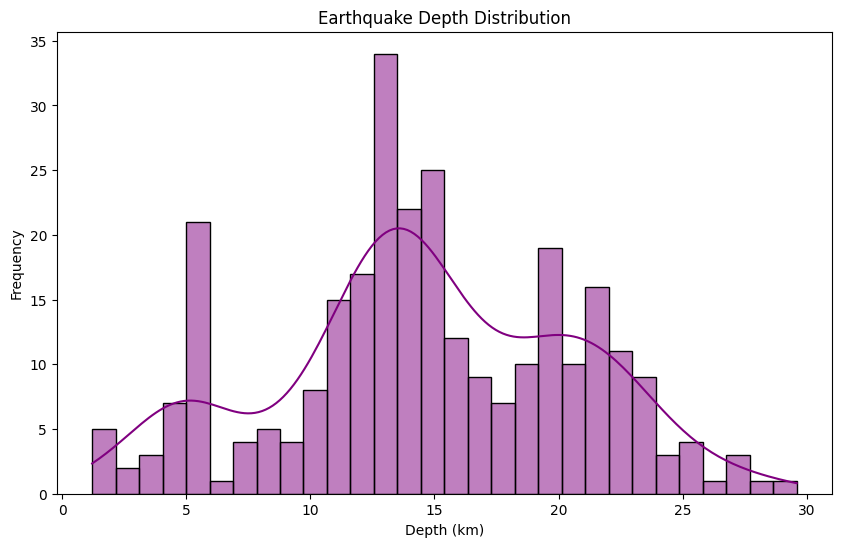

In [15]:
# 3. Visualize the 'Derinlik_km' (Depth)
plt.figure(figsize=(10, 6))
sns.histplot(df['Derinlik_km'], kde=True, color="purple", bins=30)
plt.title('Earthquake Depth Distribution')
plt.xlabel('Depth (km)')
plt.ylabel('Frequency')
plt.show()

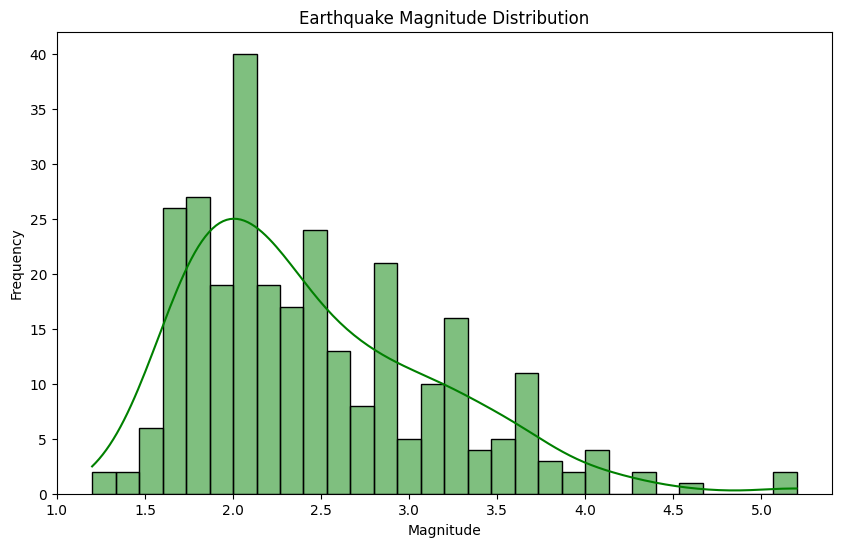

In [16]:
# 4. Visualize the 'Buyukluk' (Magnitude)
plt.figure(figsize=(10, 6))
sns.histplot(df['Buyukluk'], kde=True, color="green", bins=30)
plt.title('Earthquake Magnitude Distribution')
plt.xlabel('Magnitude')
plt.ylabel('Frequency')
plt.show()

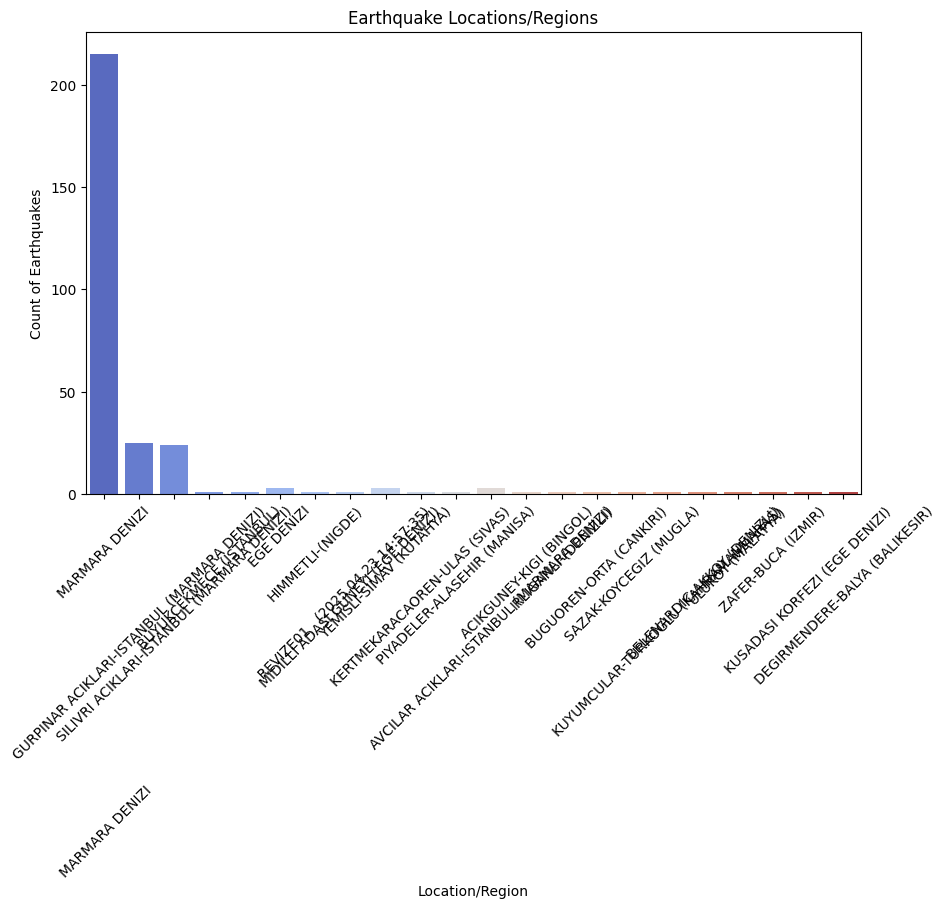

In [17]:
# 5. Visualize the 'Yer' (Location/Region)
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Yer', palette="coolwarm")
plt.title('Earthquake Locations/Regions')
plt.xlabel('Location/Region')
plt.ylabel('Count of Earthquakes')
plt.xticks(rotation=45)
plt.show()

## Predictive modeling

In [18]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [19]:
print(df.columns)


Index(['Olus_Zamani', 'Enlem', 'Boylam', 'Derinlik_km', 'Buyukluk', 'Yer',
       'Year'],
      dtype='object')


In [20]:
df["Olus_Zamani"] = pd.to_datetime(df["Olus_Zamani"])

# Extracting features from datetime
df["Saat"] = df["Olus_Zamani"].dt.hour
df["Gun"] = df["Olus_Zamani"].dt.day
df["Dakika"] = df["Olus_Zamani"].dt.minute
df["Haftanin_Gunu"] = df["Olus_Zamani"].dt.day_name()

# Step 3.2 - Categorize Earthquake Magnitudes
def classify_magnitude(mag):
    if mag < 3.5:
        return "Small"
    elif 3.5 <= mag < 5.0:
        return "Moderate"
    else:
        return "Large"

df["Buyukluk_Sinifi"] = df["Buyukluk"].apply(classify_magnitude)

# Step 3.3 - Categorize Earthquake Depth
def classify_depth(depth):
    if depth <= 15:
        return "Shallow"
    elif 15 < depth <= 50:
        return "Intermediate"
    else:
        return "Deep"

df["Derinlik_Sinifi"] = df["Derinlik_km"].apply(classify_depth)

# Step 3.4 - Region Bucketing by Latitude and Longitude
def region_label(lat, lon):
    if lat > 39 and lon > 30:
        return "Central_North"
    elif lat < 37:
        return "South"
    elif lon < 27:
        return "West"
    else:
        return "Other"

df["Bolge"] = df.apply(lambda row: region_label(row["Enlem"], row["Boylam"]), axis=1)

# Now df contains the extracted features and classifications
print(df.head())

          Olus_Zamani    Enlem   Boylam  Derinlik_km  Buyukluk  \
0 2025-04-23 13:01:02  40.8427  28.3802         21.3       4.3   
1 2025-04-23 13:02:32  40.8640  28.4223         18.7       5.2   
2 2025-04-23 13:05:43  40.8213  28.2977         12.3       3.3   
3 2025-04-23 13:06:59  40.8662  28.4270         22.9       3.6   
4 2025-04-23 13:07:30  40.8252  28.3233         11.0       3.3   

              Yer  Year  Saat  Gun  Dakika Haftanin_Gunu Buyukluk_Sinifi  \
0  MARMARA DENIZI  2025    13   23       1     Wednesday        Moderate   
1  MARMARA DENIZI  2025    13   23       2     Wednesday           Large   
2  MARMARA DENIZI  2025    13   23       5     Wednesday           Small   
3  MARMARA DENIZI  2025    13   23       6     Wednesday        Moderate   
4  MARMARA DENIZI  2025    13   23       7     Wednesday           Small   

  Derinlik_Sinifi  Bolge  
0    Intermediate  Other  
1    Intermediate  Other  
2         Shallow  Other  
3    Intermediate  Other  
4         S

In [21]:
from sklearn.preprocessing import StandardScaler

# Define the feature matrix (X) - Select the relevant columns
X = df[["Derinlik_km", "Saat", "Gun", "Dakika", "Haftanin_Gunu", "Buyukluk_Sinifi", "Derinlik_Sinifi", "Bolge"]]

# Convert categorical columns to numerical using one-hot encoding
X = pd.get_dummies(X, drop_first=True)

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Check the scaled features
print(X_scaled[:5])

[[ 1.1120695  -0.11177282 -0.57069087 -1.58648335  0.57069087  3.05310147
  -2.93825345 -1.16172006  0.16872982 -0.11846978 -0.05892557]
 [ 0.6768338  -0.11177282 -0.57069087 -1.52942839  0.57069087 -0.32753579
  -2.93825345 -1.16172006  0.16872982 -0.11846978 -0.05892557]
 [-0.39451562 -0.11177282 -0.57069087 -1.35826349  0.57069087 -0.32753579
   0.34033824  0.86079257  0.16872982 -0.11846978 -0.05892557]
 [ 1.37990685 -0.11177282 -0.57069087 -1.30120853  0.57069087  3.05310147
  -2.93825345 -1.16172006  0.16872982 -0.11846978 -0.05892557]
 [-0.61213347 -0.11177282 -0.57069087 -1.24415357  0.57069087 -0.32753579
   0.34033824  0.86079257  0.16872982 -0.11846978 -0.05892557]]


In [22]:
from sklearn.model_selection import train_test_split

# Define the target variable (y)
y = df["Buyukluk_Sinifi"]

# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=537)

# Check the shapes of the split data
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(216, 11) (73, 11) (216,) (73,)


In [23]:
# Split the dataset into training and testing
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.25, random_state=537)


In [24]:
models = {
    "Logistic Regression": LogisticRegression(
        penalty='l2',           # L2 regularization to prevent overfitting
        C=1.0,                  # Regularization strength
        max_iter=300,           # Increased max iterations to ensure convergence
        solver='lbfgs',         # Suitable for small/medium datasets and multiclass
        multi_class='multinomial'  # Multinomial loss for multi-class classification
    ),

    "Random Forest": RandomForestClassifier(
        n_estimators=150,       # Number of trees
        max_depth=12,           # Prevent deep trees (avoids overfitting)
        min_samples_split=4,    # Minimum samples to split a node
        min_samples_leaf=2,     # Minimum samples required to be at a leaf node
        bootstrap=True,         # Use bootstrapping
        random_state=42         # Reproducible results
    ),

    "Support Vector Machine": SVC(
        kernel='rbf',           # RBF kernel for non-linear separation
        C=1.0,                  # Regularization strength
        gamma='scale',          # Scales gamma based on input data
        probability=True        # Enable probability output
    )
}


In [25]:
accuracies = {}

for name, model in models.items():
    print(f"\n=== {name} ===")
    
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate accuracy
    acc = accuracy_score(y_test, y_pred)
    accuracies[name] = acc
    
    print(f"Accuracy: {acc:.4f}")  # Print accuracy
    
    print("\nClassification Report:")
    print(classification_report(y_test, y_pred))  # Precision, Recall, F1-score
    
    print("\nConfusion Matrix:")
    print(confusion_matrix(y_test, y_pred, labels=["Small", "Moderate", "Large"]))


=== Logistic Regression ===
Accuracy: 0.9863

Classification Report:
              precision    recall  f1-score   support

       Large       0.00      0.00      0.00         1
    Moderate       1.00      1.00      1.00         9
       Small       0.98      1.00      0.99        63

    accuracy                           0.99        73
   macro avg       0.66      0.67      0.66        73
weighted avg       0.97      0.99      0.98        73


Confusion Matrix:
[[63  0  0]
 [ 0  9  0]
 [ 1  0  0]]

=== Random Forest ===
Accuracy: 0.9863

Classification Report:
              precision    recall  f1-score   support

       Large       0.00      0.00      0.00         1
    Moderate       1.00      1.00      1.00         9
       Small       0.98      1.00      0.99        63

    accuracy                           0.99        73
   macro avg       0.66      0.67      0.66        73
weighted avg       0.97      0.99      0.98        73


Confusion Matrix:
[[63  0  0]
 [ 0  9  0]
 [ 1 

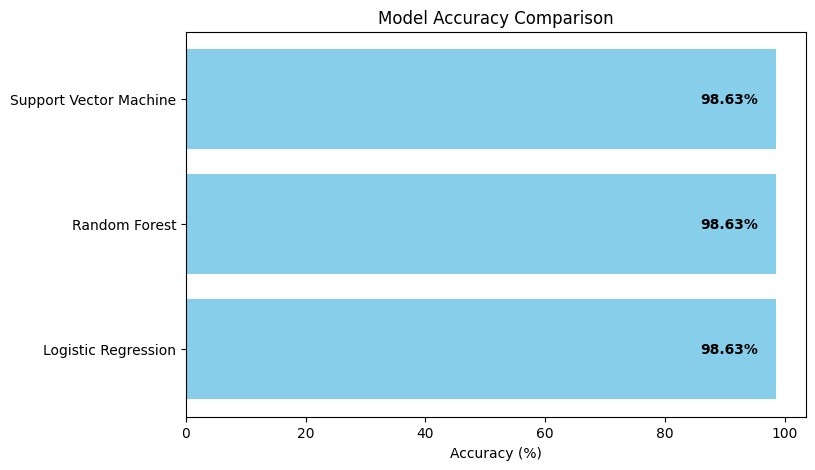

In [26]:
# Accuracy values from the models
accuracies_percent = {model: acc * 100 for model, acc in accuracies.items()}

# Create a bar chart
plt.figure(figsize=(8, 5))
bars = plt.barh(list(accuracies_percent.keys()), accuracies_percent.values(), color='skyblue')

# Adding labels and title
plt.xlabel('Accuracy (%)')
plt.title('Model Accuracy Comparison')

# Adding percentage labels on the bars
for bar in bars:
    plt.text(bar.get_width() - 3, bar.get_y() + bar.get_height()/2, f'{bar.get_width():.2f}%', 
             va='center', ha='right', color='black', fontweight='bold')

# Display the bar chart
plt.show()